<IPython.core.display.Javascript object>


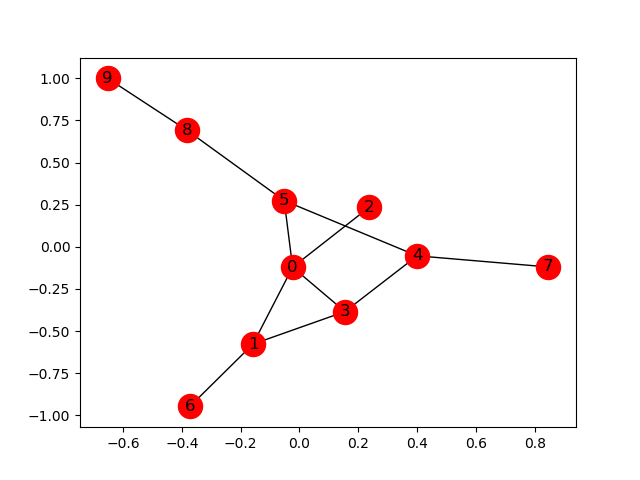

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [2]:
import networkx as nx
from networkx.utils import is_string_like
import numpy as np
import pandas as pd
%matplotlib notebook

# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G1
nx.draw_networkx(G1)

## Adjacency List

**G_adjlist.txt** is the adjacency list representation of G1.

*It can be read as follows:*

> * 0 1 2 3 5 $\rightarrow$ nnode 0 is adjacent to nodes 1,2,3,5
> * 1 3 6 $\rightarrow$ node 1 is (also) adjacent to nodes 3, 6
> * 2 $\rightarrow$ node 2 is (also) adjacent to no new nodes
> * 3 4 $\rightarrow$ node 3 is (also) adjacent to node 4
 
and so on. Note that adjacencies are only accounted for once (e.g. node 2 is adjacent to node 0, but node 0 is not listed in node 2's row, because that edge has already been accounted for in node 0's row).

In [3]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9

<IPython.core.display.Javascript object>


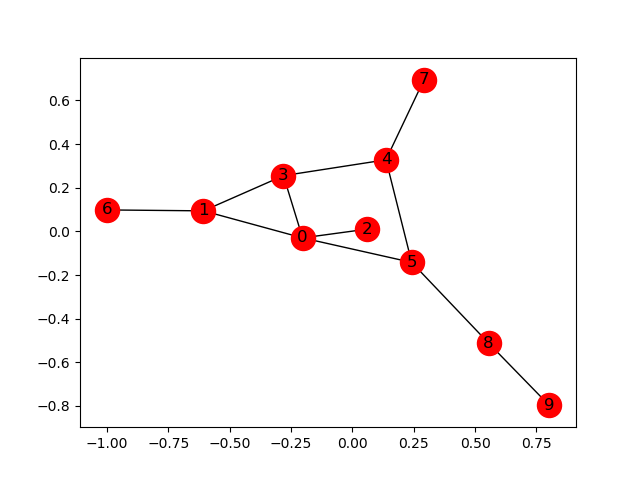

In [25]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()
nx.draw_networkx(G2)

## Adjacency Matrix 

> The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row 0, column 1 corresponds to the edge between node 0 and node 1.

Reading across row 0, there is a '1' in columns 1, 2, 3, and 5, which indicates that node 0 is adjacent to nodes 1, 2, 3, and 5

In [5]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

If we convert the adjacency matrix to a networkx graph using nx.Graph, we can see that it matches G1.

In [6]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

In [7]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1

Using **read_edgelist** and passing in a list of tuples with the name and type of each edge attribute will create a graph with our desired edge attributes.

In [13]:
G4 = nx.read_edgelist('G_edgelist.txt', data = [('Weight', int)])
G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

<IPython.core.display.Javascript object>


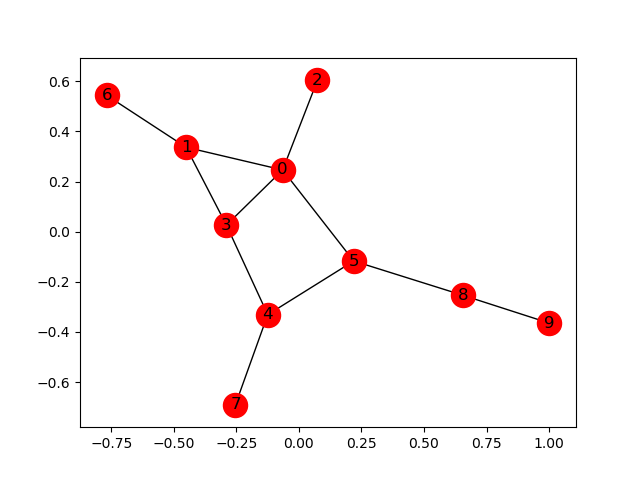

In [11]:
nx.draw_networkx(G4)

In [17]:
!cat sample.txt


















































A61K	A61K	A61K	A61P	A61K	A61K	  	  	683

<IPython.core.display.Javascript object>


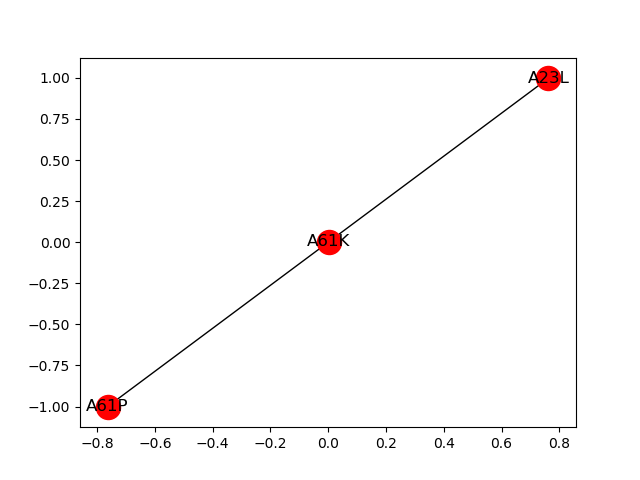

In [27]:
G5 = nx.read_adjlist('sample.txt')
G5.edges()
nx.draw_networkx(G5)

## Pandas DataFrame

Graphs can also be created from pandas dataframes if they are in edge list format.

In [29]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True,
                  header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [39]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')#In networkx 2.0 from_pandas_dataframe has been removed. 
#use from_pandas_edgelist instead
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])